In [135]:
#!pip install pyodbc
#!pip install folium
#!pip install geopy
#!pip install textblob

You should consider upgrading via the 'C:\Users\Gil\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Feature Engineering

## Setup and Imports
1. **Install Packages**:
   - Uses `pip` to install required libraries.

2. **Imports**:
   - Imports necessary libraries for data processing, visualization, and modeling.

## Data Loading and Initial Processing
3. **Load Data**:
   - Load data from pickle files into `feature_eng_df` and `reviews_df`.

4. **Clean Data**:
   - Filter `feature_eng_df` to include only positive prices.

## Geographic Information System (GIS) Features
5. **Plot Locations**:
   - Create a map visualization of property locations using Folium.

6. **Distance Calculation**:
   - Calculate distances from each property to the central point based on latitude and longitude.

7. **Scatter Plot**:
   - Plot distance to central point versus log-transformed price.

## Neighborhood Features
8. **Neighborhood Ratings**:
   - Compute average location ratings by neighborhood and rank neighborhoods.

## Date Features
9. **Create Date Features**:
   - Calculate the number of days since key dates and create indicators for missing values.

10. **Review Metrics**:
    - Calculate the range and ratio of reviews per day.

## Bin Numerical Columns
11. **Bin Columns**:
    - Bin numerical columns to reduce outliers' impact and convert to string format.

## Reviews Processing
12. **Process Reviews**:
    - Analyze review comments to generate word clouds.
    - Calculate sentiment polarity and create sentiment labels.

13. **Review Summarization**:
    - Summarize polarity and sentiment for all comments and the top 5 most recent comments per listing.




In [136]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
#warnings.simplefilter(action='ignore', category=FutureWarning)
#from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
import pyodbc

#plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import datetime
import requests
from textblob import TextBlob


In [137]:
feature_eng_df = pd.read_pickle('step_3_df.pkl')
reviews_df=pd.read_pickle('df_reviews.pkl')

In [138]:
feature_eng_df = feature_eng_df[feature_eng_df['Price'] > 0]
feature_eng_df.describe()

,Listing ID,Host ID,Host Since,Host Response Rate,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,...,Is Superhost_ind,Is Exact Location_ind,Host Response Rate_missing,Checkin Rating_missing,Value Rating_missing,Location Rating_missing,Accuracy Rating_missing,Communication Rating_missing,Cleanliness Rating_missing,Overall Rating_missing
count,1.258300e+04,1.258300e+04,12572,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000,...,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000,12583.000000
mean,2.032937e+07,7.016790e+07,2015-07-08 01:34:09.125039616,-0.308446,52.509915,13.406181,2.607884,1.077168,1.140428,1.570611,...,0.135421,0.753477,0.419296,0.209886,0.209807,0.209648,0.209251,0.209092,0.209012,0.208297
min,2.695000e+03,2.217000e+03,2008-08-18 00:00:00,-2.000000,52.347650,13.097180,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.706876e+06,1.104791e+07,2014-01-11 00:00:00,-2.000000,52.488980,13.376390,2.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.247879e+07,3.797590e+07,2015-07-12 00:00:00,0.800000,52.509210,13.417130,2.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.958331e+07,1.120804e+08,2017-01-24 00:00:00,1.000000,52.532730,13.439750,3.000000,1.000000,1.000000,2.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.468232e+07,2.616142e+08,2019-05-13 00:00:00,1.000000,52.651670,13.757640,16.000000,4.000000,8.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.039978e+07,7.525248e+07,NaN,1.445477,0.030387,0.055397,1.459605,0.267686,0.625510,1.080492,...,0.342186,0.431004,0.493463,0.407243,0.407187,0.407074,0.406790,0.406676,0.406619,0.406106


## features from GIS

In [139]:
import folium
from folium.plugins import FastMarkerCluster
lats2018 = feature_eng_df['Latitude'].tolist()
lons2018 = feature_eng_df['Longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.651670, 13.757640], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [140]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle


# Calculate the mode (most frequent value) for Latitude and Longitude
center_lat = feature_eng_df['Latitude'].mode()[0]
center_lon = feature_eng_df['Longitude'].mode()[0]

# Define the central point
central_point = (center_lat, center_lon)

# Function to calculate great-circle distance
def calculate_distance(row):
    return great_circle((row['Latitude'], row['Longitude']), central_point).kilometers

# Apply the function to calculate distances
feature_eng_df['Distance_to_Center'] = feature_eng_df.apply(calculate_distance, axis=1)




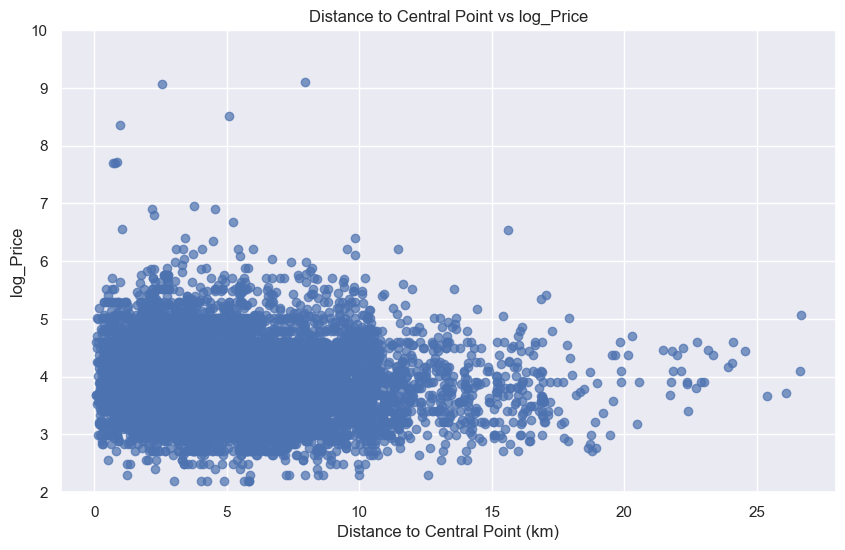

In [141]:
import matplotlib.pyplot as plt
import numpy as np
y=np.log(feature_eng_df['Price'])
plt.figure(figsize=(10, 6))
plt.scatter(feature_eng_df['Distance_to_Center'], y , alpha=0.7)
plt.title('Distance to Central Point vs log_Price')
plt.xlabel('Distance to Central Point (km)')
plt.ylim(2, 10)  # Limit x-axis to show up to 1000 km
plt.ylabel('log_Price')
plt.grid(True)
plt.show()

In [142]:
# Calculate the average Location Rating for each neighborhood
neighbourhood_avg_rating = feature_eng_df.groupby('neighbourhood')['Location Rating'].mean()

#Rank neighborhoods based on their average Location Rating
neighbourhood_avg_rating = neighbourhood_avg_rating.sort_values(ascending=False).reset_index()

# Create a new feature in the original DataFrame
feature_eng_df = feature_eng_df.merge(neighbourhood_avg_rating, on='neighbourhood', suffixes=('', '_Avg'))
feature_eng_df['Attractive_Neighbourhood'] = feature_eng_df['Location Rating_Avg'].rank(method='dense', ascending=False)


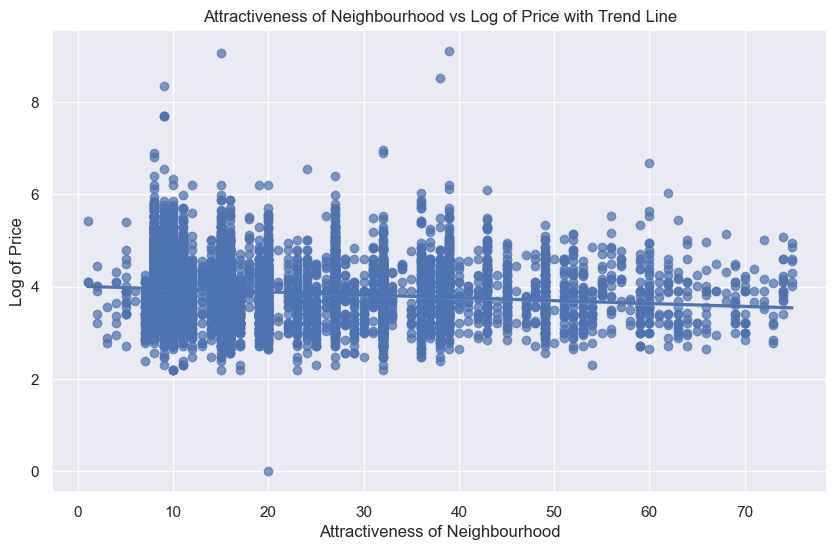

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that there are no zero or negative values in 'Price' before applying log
#df = df[df['Price'] > 0]

# Scatter plot with log of Price and a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='Attractive_Neighbourhood', y=np.log(feature_eng_df['Price']), data=feature_eng_df, scatter_kws={'alpha':0.7})
plt.title('Attractiveness of Neighbourhood vs Log of Price with Trend Line')
plt.xlabel('Attractiveness of Neighbourhood')
plt.ylabel('Log of Price')
plt.grid(True)
plt.show()



# features from dates 

In [144]:



# Replace missing values with -2 and create indicator columns
for col in ['Host Since', 'First Review','Last Review']:
    # Create feature engineering columns with more descriptive names
    days_col = f'Days Since {col.split()[0]} Joined'
    missing_col = f'{col.split()[0]} Missing Indicator'
    
    feature_eng_df[days_col] = (pd.to_datetime('today') - feature_eng_df[col]).dt.days
    feature_eng_df[days_col].fillna(-2, inplace=True)
    
    feature_eng_df[missing_col] = feature_eng_df[col].isnull().astype(int)


# Calculate the range of reviews in days
feature_eng_df['Review Range (Days)'] = (feature_eng_df['Last Review'] - feature_eng_df['First Review']).dt.days
# Fill missing values in the 'Review Range (Days)' column with 0
feature_eng_df['Review Range (Days)'] = feature_eng_df['Review Range (Days)'].fillna(0)
# Calculate the ratio between the count of reviews and the range of reviews
feature_eng_df['Reviews per Day Ratio'] = feature_eng_df['Reviews'] / feature_eng_df['Review Range (Days)']

# Handle cases where the review range is zero to avoid division by zero
feature_eng_df['Reviews per Day Ratio'] = feature_eng_df['Reviews per Day Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)


Bin numerical columns to reduce the impact of outliers.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def bin_numerical_columns(df, cols, outlier_threshold=1.5):
    for col in cols:
        # Calculate the IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine the number of bins based on the distribution
        num_bins = int(np.ceil(np.log2(len(df[col].dropna())) + 1))

        # Define bin edges
        bins = pd.qcut(df[col], q=num_bins, duplicates='drop', retbins=True)[1]
        
        # Extend bins to include outliers
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR
        bins = np.append(bins, [lower_bound, upper_bound])
        bins = np.unique(bins)

        # Bin the column and convert to string
        binned_col_name = f'{col} Binned'
        df[binned_col_name] = pd.cut(df[col], bins=bins, include_lowest=True).astype(str)

        # Plot the original and binned distribution
    
#        plt.figure(figsize=(15, 6))
#        plt.subplot(1, 2, 1)
#        sns.histplot(df[col].dropna(), kde=True)
#        plt.title(f'{col} Distribution')
#        plt.subplot(1, 2, 2)
#        sns.countplot(x=df[binned_col_name])
#        plt.title(f'{col} Binned')
#        plt.xticks(rotation=45)
#        plt.show()

    return df

# Example usage
cols_bin = ['Bedrooms', 'Guests Included', 'Bathrooms', 'Min Nights', 'Accomodates', 'Beds']

# Add the binned columns into feature_eng_df with dtype as string
feature_eng_df = bin_numerical_columns(feature_eng_df, cols_bin)

feature_eng_df['Latitude Binned'] = pd.cut(feature_eng_df['Latitude'], bins=5, labels=False)
feature_eng_df['Longitude Binned'] = pd.cut(feature_eng_df['Longitude'], bins=5, labels=False)

In [146]:
# List of columns to convert to string
columns_to_convert = ['Bedrooms Binned', 'Guests Included Binned', 'Bathrooms Binned', 
                       'Min Nights Binned', 'Accomodates Binned', 'Beds Binned']

# Convert specified columns to string
for col in columns_to_convert:
    feature_eng_df[col] = feature_eng_df[col].astype('string')
feature_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12583 entries, 0 to 12582
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Listing ID                    12583 non-null  float64       
 1   Listing Name                  12583 non-null  string        
 2   Host ID                       12583 non-null  float64       
 3   Host Name                     12583 non-null  string        
 4   Host Since                    12572 non-null  datetime64[ns]
 5   Host Response Time            12583 non-null  string        
 6   Host Response Rate            12583 non-null  float64       
 7   neighbourhood                 12583 non-null  string        
 8   Neighborhood Group            12583 non-null  string        
 9   City                          12583 non-null  string        
 10  Country Code                  12583 non-null  string        
 11  Latitude                    

##  feature from reviews     

In [147]:
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456961 entries, 0 to 456960
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Review ID      452805 non-null  Int64         
 1   review_date    452805 non-null  datetime64[ns]
 2   Reviewer ID    452805 non-null  Int64         
 3   Reviewer Name  452805 non-null  string        
 4   Comments       452595 non-null  object        
 5   Listing ID     456961 non-null  int64         
 6   Listing Name   456756 non-null  string        
dtypes: Int64(2), datetime64[ns](1), int64(1), object(1), string(2)
memory usage: 25.3+ MB


In [148]:

reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])

#Sort the DataFrame by Listing ID and Review Date
reviews_df = reviews_df.sort_values(by=['Listing ID', 'review_date'])

#Calculate the time difference between consecutive reviews
reviews_df['time_diff_reviews'] = reviews_df.groupby('Listing ID')['review_date'].diff()

#Calculate the average time difference for each Listing ID
average_time_between_reviews = reviews_df.groupby('Listing ID')['time_diff_reviews'].mean().reset_index()

# Convert time_diff to days and change dtype to float64
average_time_between_reviews['time_diff_reviews'] = average_time_between_reviews['time_diff_reviews'].dt.days.astype('float64')

# Merge average_time_between_reviews with feature_eng_df
feature_eng_df = feature_eng_df.merge(average_time_between_reviews, on='Listing ID', how='left')

# Fill NaN values with -2 after merging
feature_eng_df['time_diff_reviews'].fillna(-2, inplace=True)

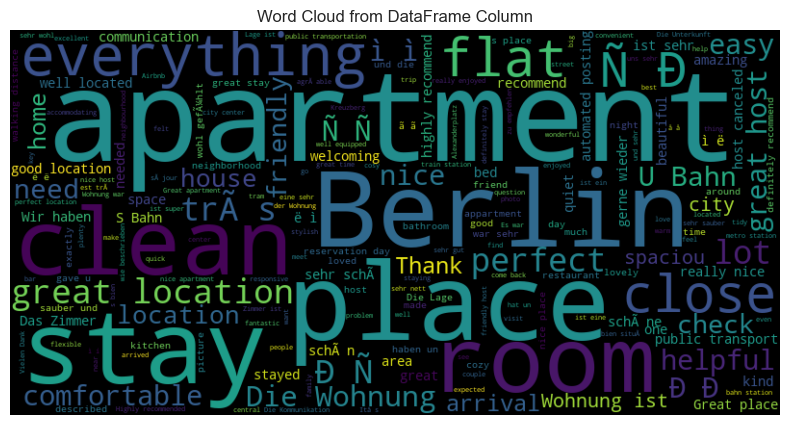

In [150]:
#creating the word cloud
import nltk
from wordcloud import WordCloud
text=reviews_df['Comments']
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame Column")
plt.show()

In [152]:

# Step 1: Calculate Polarity
def get_polarity(review):
    if isinstance(review, str):
        return TextBlob(review).sentiment.polarity
    else:
        return None

reviews_df['Polarity'] = reviews_df['Comments'].apply(get_polarity)

# Step 2: Calculate Sentiment
reviews_df['Sentiment'] = 0  # Initialize the sentiment column to 0
reviews_df.loc[reviews_df['Polarity'] < 0, 'Sentiment'] = -1
reviews_df.loc[reviews_df['Polarity'] > 0, 'Sentiment'] = 1
reviews_df['Sentiment'] = reviews_df['Sentiment'].astype(str)




In [153]:
reviews_df[['Comments', 'Polarity','Sentiment']].head()

,Comments,Polarity,Sentiment
271258,I really enjoyed staying at Micha and Nadja's ...,0.495000,1
271259,"Nadja, Michael & Jason were very friendly and ...",0.464583,1
271260,Super nice and friendly. Great communication a...,0.559722,1
271261,Michael and Nadja were wonderful hosts! The ap...,0.440000,1
271262,The place was just as in the pictures which I ...,0.270000,1


In [154]:


# Step 3: Summarize Polarity and Sentiment for All Comments per Listing ID
summary_all_comments = reviews_df.groupby('Listing ID').agg(
    avg_polarity_all=('Polarity', 'mean'),
    avg_sentiment_all=('Sentiment', lambda x: x.value_counts().idxmax())  # Most frequent sentiment
).reset_index()

# Step 4: Summarize Polarity and Sentiment for the 5 Most Recent Comments per Listing ID
# First, sort by Listing ID and review_date, then pick the 5 most recent
reviews_df = reviews_df.sort_values(['Listing ID', 'review_date'], ascending=[True, False])

# Take the top 5 comments per Listing ID
recent_5_reviews = reviews_df.groupby('Listing ID').head(5)

# Summarize for the top 5 comments
summary_recent_5_comments = recent_5_reviews.groupby('Listing ID').agg(
    avg_polarity_top_5=('Polarity', 'mean'),
    avg_sentiment_top_5=('Sentiment', lambda x: x.value_counts().idxmax())
).reset_index()

# Merge the summaries with the main DataFrame without dropping original columns
feature_eng_df = feature_eng_df.merge(summary_all_comments, on='Listing ID', how='left')
feature_eng_df = feature_eng_df.merge(summary_recent_5_comments, on='Listing ID', how='left')



In [155]:

# List of columns to be updated
columns_to_update = ['avg_polarity_all', 'avg_sentiment_all', 'avg_sentiment_top_5','avg_polarity_top_5']

# Fill NaN values with 0 and convert columns to float64
for col in columns_to_update:
    feature_eng_df[col] = feature_eng_df[col].fillna(0).astype('float64')
#

In [157]:
# Drop the specified columns
columns_to_drop = ['Country Code', 'City', 'Listing Name', 'Host Name', 'Host ID']
feature_eng_df.drop(columns=columns_to_drop, inplace=True)

# Identify datetime columns
datetime_columns = feature_eng_df.select_dtypes(include=['datetime']).columns

# Drop datetime columns
feature_eng_df.drop(columns=datetime_columns, inplace=True)


In [158]:
feature_eng_df.head()


,Listing ID,Host Response Time,Host Response Rate,neighbourhood,Neighborhood Group,Latitude,Longitude,Property Type,Room Type,Accomodates,...,Min Nights Binned,Accomodates Binned,Beds Binned,Latitude Binned,Longitude Binned,time_diff_reviews,avg_polarity_all,avg_sentiment_all,avg_polarity_top_5,avg_sentiment_top_5
0,13761071.0,within a few hours,1.0,Mitte,Mitte,52.50920,13.41762,Apartment,Entire home/apt,6.0,...,"(4.0, 5.0]","(5.0, 16.0]","(3.5, 12.0]",2,2,8.0,0.346960,1.0,0.310000,1.0
1,13763834.0,Missing,-2.0,NeukÃ¶lln,NeukÃ¶lln,52.46713,13.42733,Apartment,Entire home/apt,2.0,...,"(1.0, 2.0]","(1.0, 2.0]","(1.0, 2.0]",1,2,28.0,0.368619,1.0,0.194133,1.0
2,13764102.0,Missing,-2.0,Mitte,Mitte,52.53294,13.40649,Apartment,Private room,2.0,...,"(-1.001, 1.0]","(1.0, 2.0]","(0.0, 1.0]",3,2,-2.0,0.000000,0.0,0.000000,0.0
3,13764166.0,Missing,-2.0,Charlottenburg,Charlottenburg-Wilm.,52.52670,13.30916,Apartment,Private room,2.0,...,"(-1.001, 1.0]","(1.0, 2.0]","(0.0, 1.0]",2,1,-2.0,0.000000,0.0,0.000000,0.0
4,13765505.0,Missing,-2.0,Prenzlauer Berg,Pankow,52.53924,13.43521,Apartment,Private room,1.0,...,"(1.0, 2.0]","(0.499, 1.0]","(0.0, 1.0]",3,2,13.0,0.381355,1.0,0.385260,1.0


In [159]:
feature_eng_df.to_pickle('step_4_df.pkl')